<!--
---
title: "Exploratory Data Analysis (EDA) for Regression"
author: "Darya Vanichkina, David Kohn"
exercises: 30
keypoints: 
- EDA is the first step of any analysis, and often very time consuming.
- Skipping EDA can result in substantial issues with subsequent analysis.
source: Rmd
start: 0
teaching: 30
bibliography: references.bib
---
-->

### Exploratory Data Analysis (EDA) for Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
# pip install UpSetPlot #no conda option??
import upsetplot
%matplotlib inline
sns.set(font_scale = 1.5)

## Load the data

In [2]:
ameshousingClean = pd.read_csv('data/AmesHousingClean.csv')
ameshousingDirty = pd.read_csv('data/AmesHousingDirty.csv')

What are the dimensions of the data?

In [3]:
print(ameshousingClean.shape)
print(ameshousingDirty.shape)

(2930, 81)
(2930, 82)


Look at the data:

In [4]:
ameshousingClean.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


What types are each of the columns?

In [5]:
ameshousingClean.dtypes

MS_SubClass            object
MS_Zoning              object
Lot_Frontage            int64
Lot_Area                int64
Street                 object
Alley                  object
Lot_Shape              object
Land_Contour           object
Utilities              object
Lot_Config             object
Land_Slope             object
Neighborhood           object
Condition_1            object
Condition_2            object
Bldg_Type              object
House_Style            object
Overall_Qual           object
Overall_Cond           object
Year_Built              int64
Year_Remod_Add          int64
Roof_Style             object
Roof_Matl              object
Exterior_1st           object
Exterior_2nd           object
Mas_Vnr_Type           object
Mas_Vnr_Area            int64
Exter_Qual             object
Exter_Cond             object
Foundation             object
Bsmt_Qual              object
                       ...   
Kitchen_AbvGr           int64
Kitchen_Qual           object
TotRms_Abv

Get information about index type and column types, non-null values and memory usage.

In [6]:
ameshousingClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
MS_SubClass           2930 non-null object
MS_Zoning             2930 non-null object
Lot_Frontage          2930 non-null int64
Lot_Area              2930 non-null int64
Street                2930 non-null object
Alley                 2930 non-null object
Lot_Shape             2930 non-null object
Land_Contour          2930 non-null object
Utilities             2930 non-null object
Lot_Config            2930 non-null object
Land_Slope            2930 non-null object
Neighborhood          2930 non-null object
Condition_1           2930 non-null object
Condition_2           2930 non-null object
Bldg_Type             2930 non-null object
House_Style           2930 non-null object
Overall_Qual          2930 non-null object
Overall_Cond          2930 non-null object
Year_Built            2930 non-null int64
Year_Remod_Add        2930 non-null int64
Roof_Style            2930 non-null o

Compare with "non-clean" dataset

In [7]:
ameshousingDirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

Explore how many null values are in the clean dataset

In [8]:
ameshousingClean.isnull().sum(axis = 0)

MS_SubClass           0
MS_Zoning             0
Lot_Frontage          0
Lot_Area              0
Street                0
Alley                 0
Lot_Shape             0
Land_Contour          0
Utilities             0
Lot_Config            0
Land_Slope            0
Neighborhood          0
Condition_1           0
Condition_2           0
Bldg_Type             0
House_Style           0
Overall_Qual          0
Overall_Cond          0
Year_Built            0
Year_Remod_Add        0
Roof_Style            0
Roof_Matl             0
Exterior_1st          0
Exterior_2nd          0
Mas_Vnr_Type          0
Mas_Vnr_Area          0
Exter_Qual            0
Exter_Cond            0
Foundation            0
Bsmt_Qual             0
                     ..
Kitchen_AbvGr         0
Kitchen_Qual          0
TotRms_AbvGrd         0
Functional            0
Fireplaces            0
Fireplace_Qu          0
Garage_Type           0
Garage_Finish         0
Garage_Cars           0
Garage_Area           0
Garage_Qual     

What about in the original?

In [9]:
ameshousingDirty.isnull().sum(axis = 0)

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

Find out what's the top missing:

In [10]:
missingNo = ameshousingDirty.isnull().sum(axis = 0).sort_values(ascending = False)
missingNo = missingNo[missingNo.values  > 0]
missingNo

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Yr Blt      159
Garage Cond        159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
BsmtFin Type 1      80
Bsmt Cond           80
Bsmt Qual           80
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
Garage Area          1
Garage Cars          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Electrical           1
dtype: int64

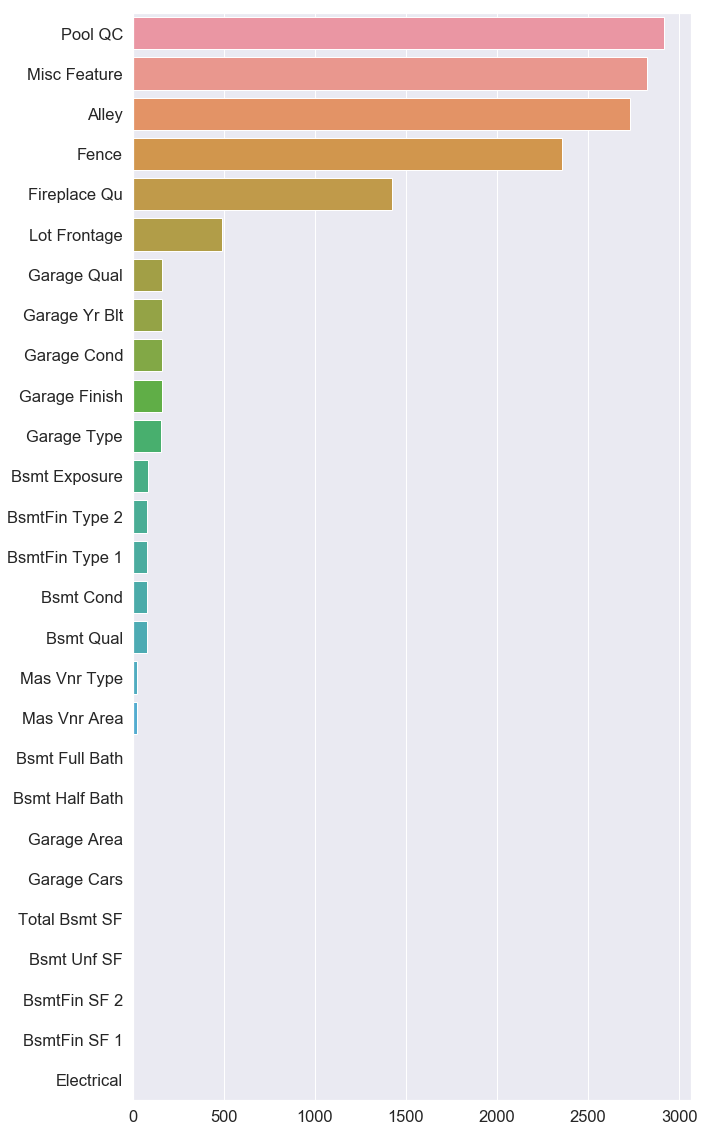

In [11]:
f, ax = plt.subplots(figsize = (10, 20))
sns.barplot(missingNo.values, missingNo.index, ax = ax)

In [12]:
# not sure how to do the upsetplot for missingness - FIXME
# also upsetplot is Joel's package, so probably plug that LOL
# upsetplot.plot()
# ref https://upsetplot.readthedocs.io/en/stable/_examples/plot_boston.html#sphx-glr-examples-plot-boston-py

> ### Challenge: Missingness
>
> Compare the entries in the "clean" and "dirty" data frames. How was the data cleaned up?

>
> 
> {: .source}
>
> > ## Solution
> > 
> > ~~~
> > # poolQC
> > print(ameshousingDirty['Pool QC'].value_counts())
> > print(ameshousingClean['Pool_QC'].value_counts())
> > # Misc Feature
> > print(ameshousingDirty['Misc Feature'].value_counts())
> > print(ameshousingClean['Misc_Feature'].value_counts())
> > # Alley
> > print(ameshousingDirty['Alley'].value_counts())
> > print(ameshousingClean['Alley'].value_counts())
> > # Fence              2358
> > print(ameshousingDirty['Fence'].value_counts())
> > print(ameshousingClean['Fence'].value_counts())
> > # Fireplace Qu       1422
> > print(ameshousingDirty['Fireplace Qu'].value_counts())
> > print(ameshousingClean['Fireplace_Qu'].value_counts())
> > # Lot Frontage        490
> > print(ameshousingDirty['Lot Frontage'].describe())
> > print(ameshousingClean['Lot_Frontage'].describe())
> > # Garage Qual         159
> > print(ameshousingDirty['Garage Qual'].value_counts())
> > print(ameshousingClean['Garage_Qual'].value_counts())
> > ~~~
> > 
> > {: .output}
> {: .solution}
{: .challenge}

***
## Explore the data to see whether there are any unusual relationships between variables 

#### Pull out numeric and categoric variables:

1. What data types do I have in my data? Can I infer that some of them are categorical, and others are not?

In [13]:
ameshousingClean.dtypes.value_counts()

object     46
int64      33
float64     2
dtype: int64

2. Pull out the categorical and numerical variables

In [14]:
catVars = ameshousingClean.select_dtypes(include = ['object']).columns
numericVars = ameshousingClean.select_dtypes(exclude = ['object']).columns

3. Plot the first 11 numerical variables

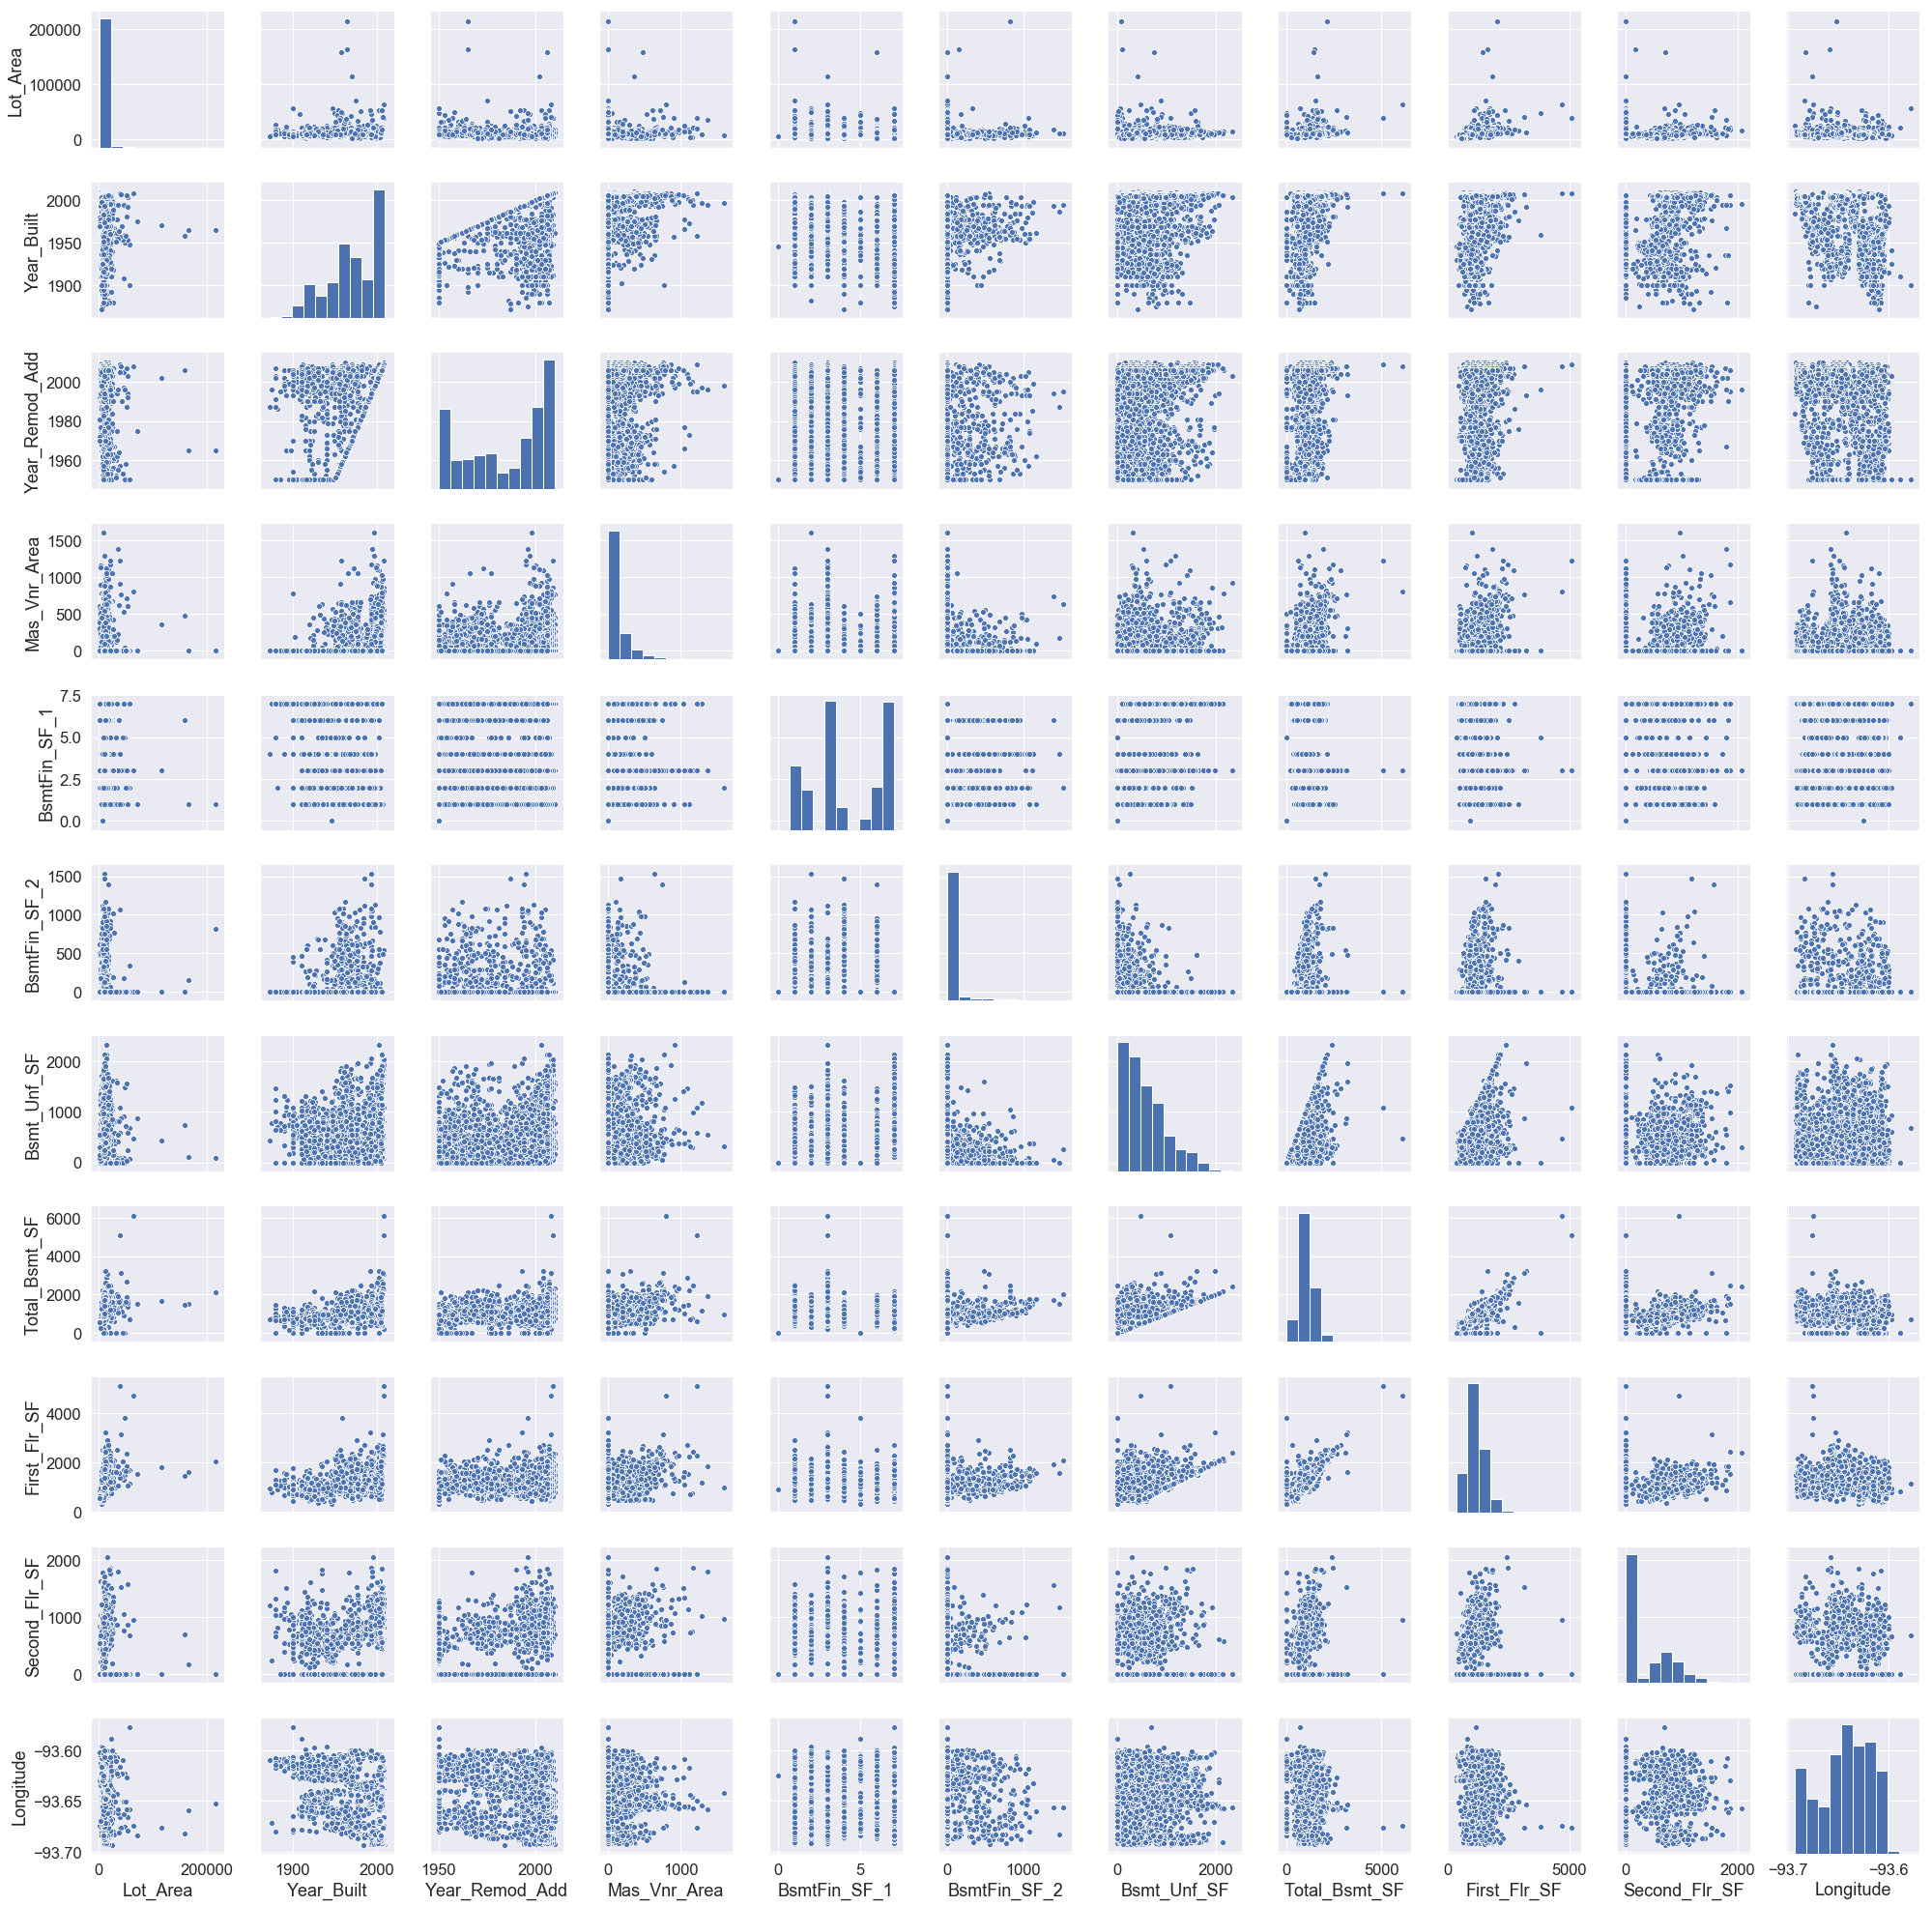

In [15]:
sns.pairplot(
    ameshousingClean,
    vars = numericVars[np.append(np.arange(1, 11), 33)]
)

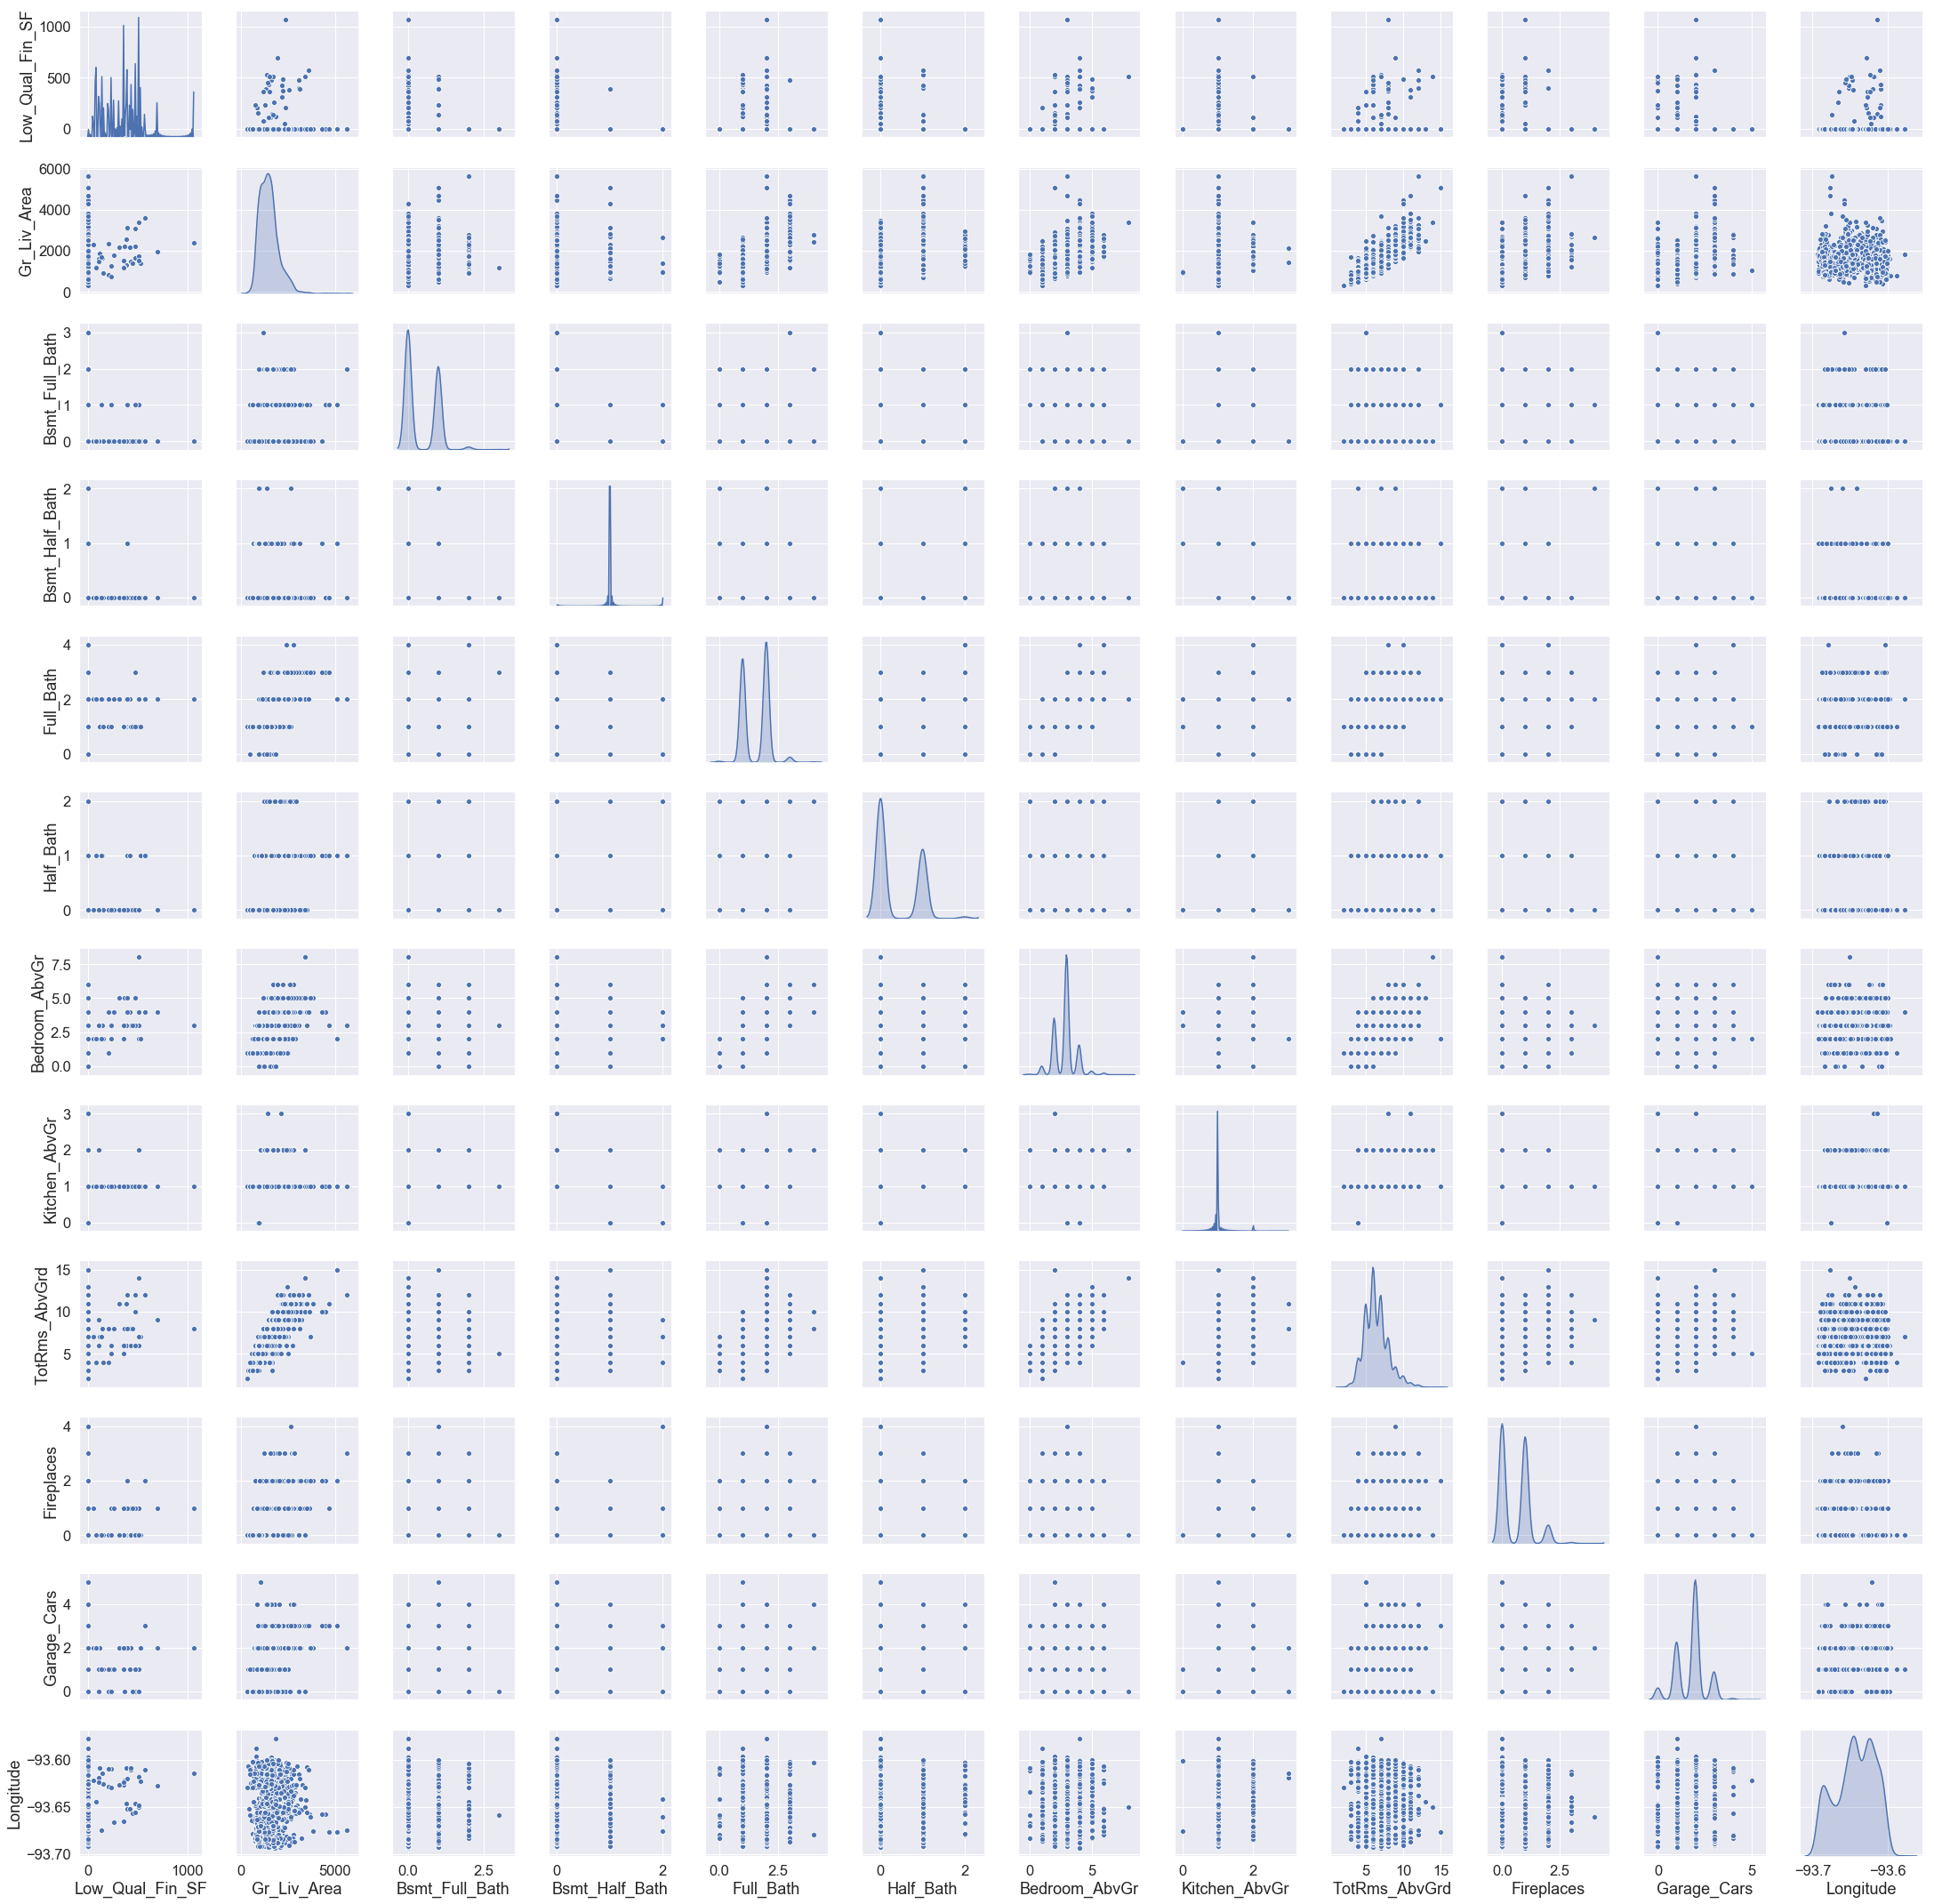

In [16]:
sns.pairplot(
    ameshousingClean,
    diag_kind="kde",
    vars = numericVars[np.append(np.arange(11, 22), 33)])

Of the numeric variables, which ones are the most correlated (with Sale price, and, more critically, with each other)?

In [17]:
ameshousingClean[list(numericVars)].corr().round(2).sort_values('Sale_Price', ascending = False)

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Year_Sold,Sale_Price,Longitude,Latitude
Sale_Price,0.20,0.27,0.56,0.53,0.50,-0.13,0.01,0.18,0.63,0.62,...,-0.13,0.03,0.11,0.07,-0.02,0.04,-0.03,1.00,-0.25,0.29
Gr_Liv_Area,0.19,0.29,0.24,0.32,0.40,0.05,-0.02,0.24,0.45,0.56,...,0.00,0.01,0.09,0.14,0.07,0.04,-0.03,0.71,-0.14,0.18
Garage_Cars,0.14,0.18,0.54,0.42,0.36,-0.08,-0.01,0.18,0.44,0.44,...,-0.13,0.02,0.04,0.03,-0.02,0.05,-0.02,0.65,-0.22,0.26
Garage_Area,0.19,0.21,0.48,0.38,0.37,-0.10,0.00,0.16,0.49,0.49,...,-0.11,0.03,0.06,0.05,0.01,0.04,-0.01,0.64,-0.21,0.21
Total_Bsmt_SF,0.21,0.25,0.41,0.30,0.39,-0.16,0.09,0.41,1.00,0.80,...,-0.08,0.04,0.08,0.07,0.08,0.02,-0.01,0.63,-0.16,0.18
First_Flr_SF,0.24,0.33,0.31,0.24,0.39,-0.12,0.08,0.30,0.80,1.00,...,-0.07,0.04,0.10,0.12,0.09,0.04,-0.01,0.62,-0.14,0.13
Year_Built,0.03,0.02,1.00,0.61,0.31,-0.18,-0.03,0.13,0.41,0.31,...,-0.37,0.02,-0.04,0.00,-0.01,0.01,-0.01,0.56,-0.43,0.25
Full_Bath,0.08,0.13,0.47,0.46,0.25,0.05,-0.08,0.27,0.33,0.37,...,-0.12,0.02,-0.02,0.03,-0.01,0.05,-0.00,0.55,-0.23,0.21
Year_Remod_Add,0.07,0.02,0.61,1.00,0.19,-0.05,-0.06,0.17,0.30,0.24,...,-0.22,0.04,-0.05,-0.01,-0.00,0.02,0.03,0.53,-0.32,0.18
Mas_Vnr_Area,0.11,0.13,0.31,0.19,1.00,-0.11,-0.01,0.09,0.39,0.39,...,-0.11,0.01,0.07,0.00,0.05,-0.00,-0.02,0.50,-0.08,0.22


In [18]:
"""ggpairs(data = ameshousing, 
        columns = c(catVars[2:5], "Sale_Price"), 
        title = "Some categorical variables")"""
# not sure how to make this plot in python without a lot of code
# i think might be easiest to separate the plot types out (boxplots, bar charts, densities)
# and plot each one

'ggpairs(data = ameshousing, \n        columns = c(catVars[2:5], "Sale_Price"), \n        title = "Some categorical variables")'

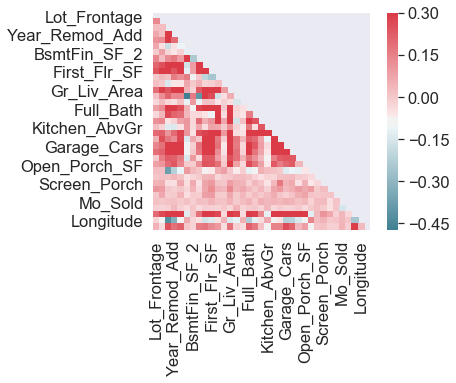

In [19]:
corr = ameshousingClean[numericVars].corr()
rs = np.random.RandomState(33)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, square=True)

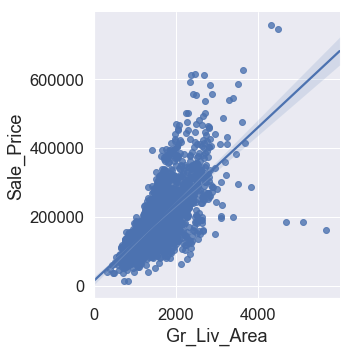

In [21]:
sns.lmplot(
    data = ameshousingClean,
    x = 'Gr_Liv_Area', y = 'Sale_Price'
)

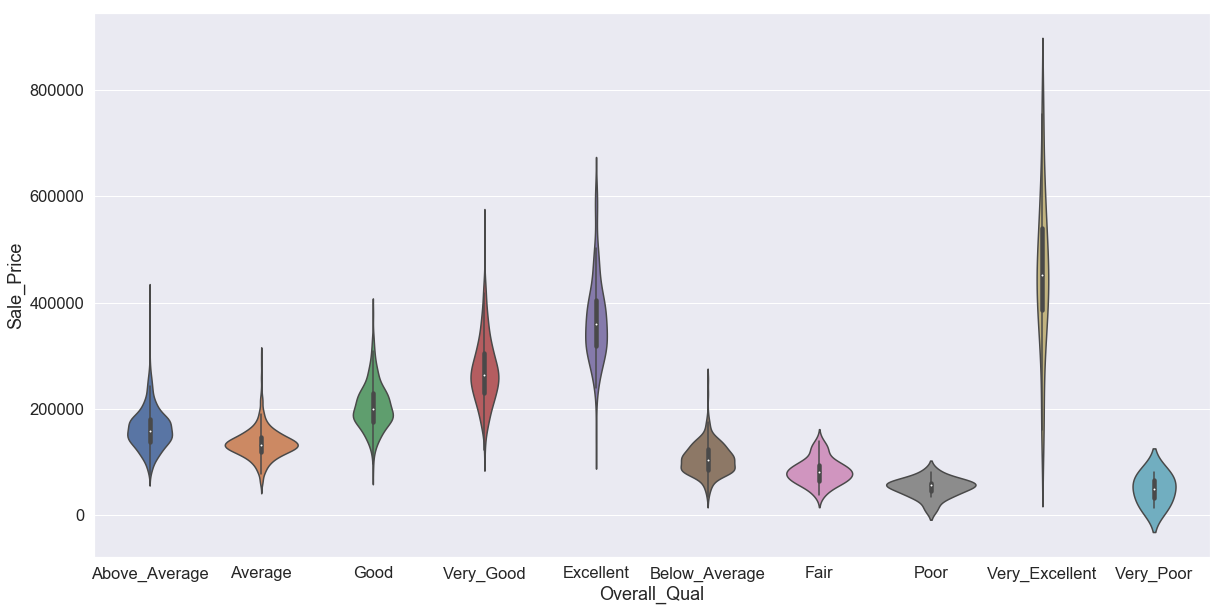

In [22]:
f, ax = plt.subplots(figsize = (20, 10))
sns.violinplot(
    x = 'Overall_Qual',
    y = 'Sale_Price',
    data = ameshousingClean,
    ax = ax
)

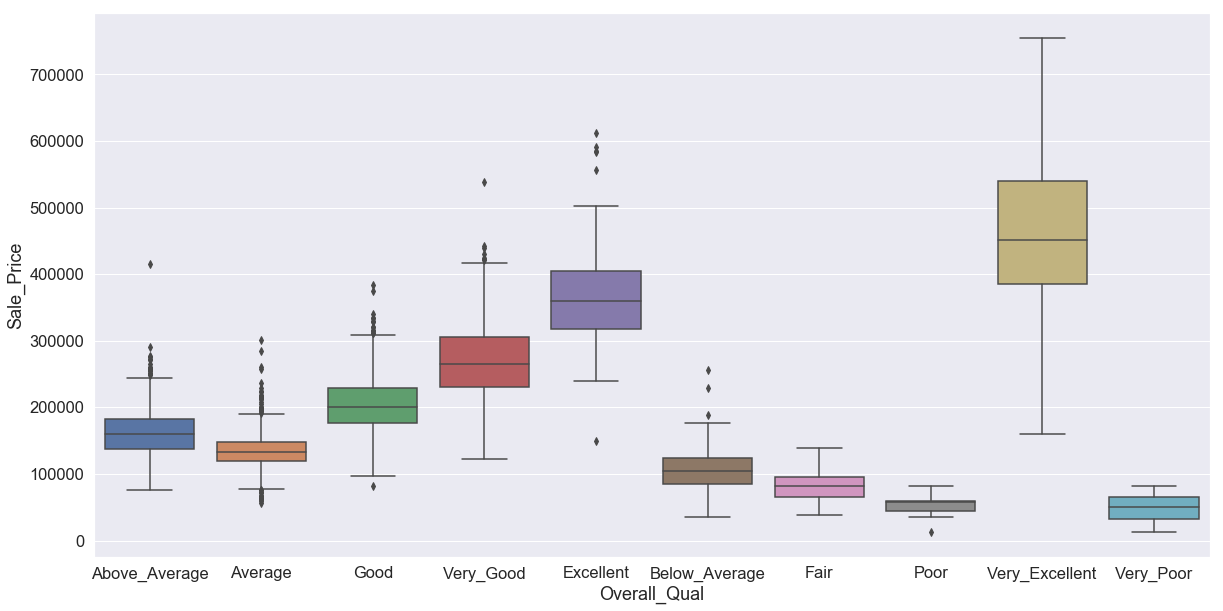

In [23]:
f, ax = plt.subplots(figsize = (20, 10))
sns.boxplot(
    x = 'Overall_Qual',
    y = 'Sale_Price',
    data = ameshousingClean,
    ax = ax
)

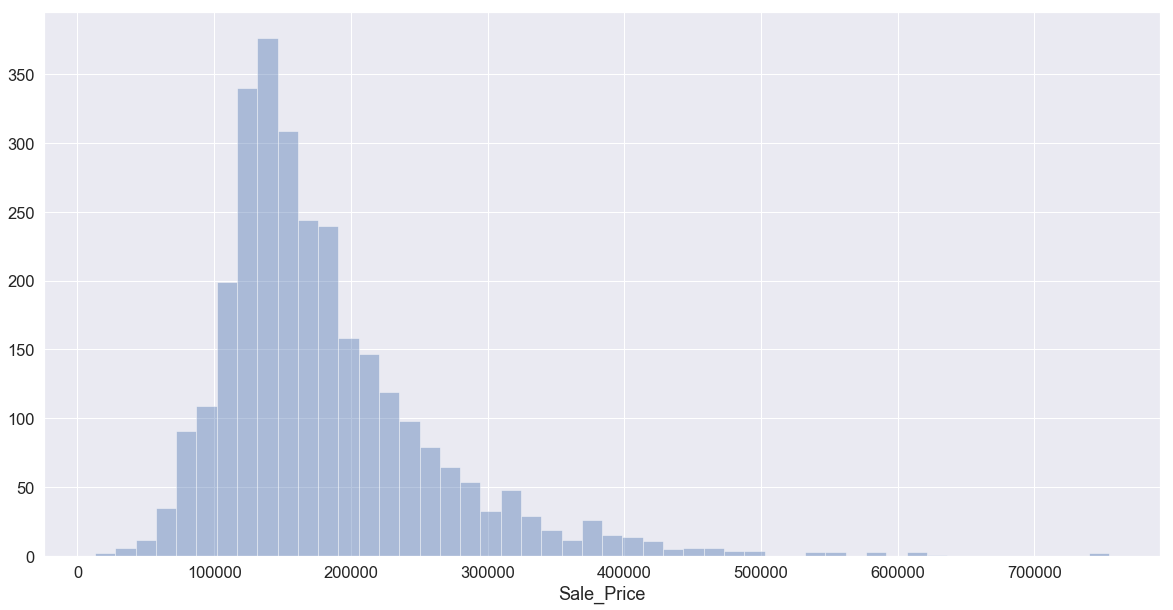

In [24]:
f, ax = plt.subplots(figsize = (20, 10))
sns.distplot(
    ameshousingClean['Sale_Price'],
    kde = False,
    ax = ax
)

In [25]:
ameshousingCleanFiltered = ameshousingClean.loc[ameshousingClean['Gr_Liv_Area'] <= 4000, :]

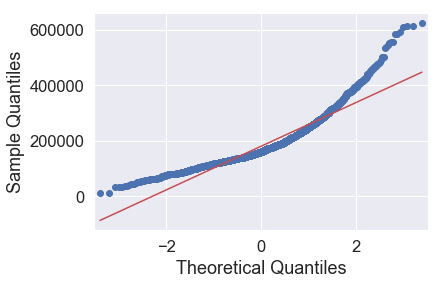

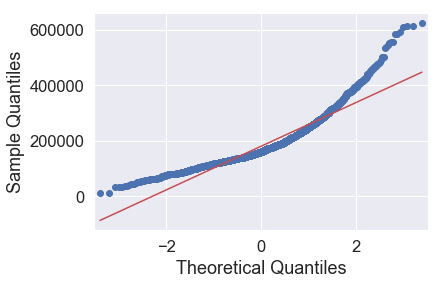

In [26]:
sm.qqplot(
    ameshousingCleanFiltered['Sale_Price'],
    line = 's'
)

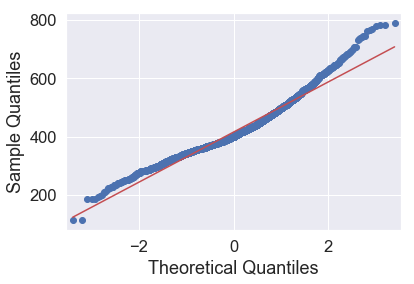

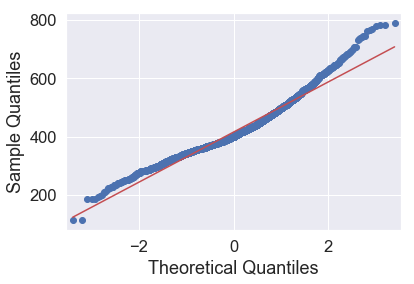

In [27]:
sm.qqplot(
    np.sqrt(ameshousingCleanFiltered['Sale_Price']),
    line = 's'
)

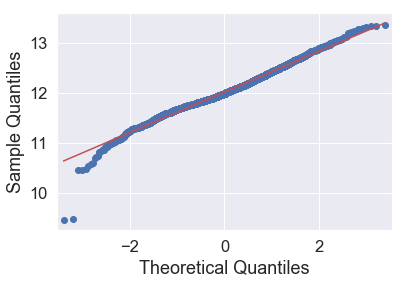

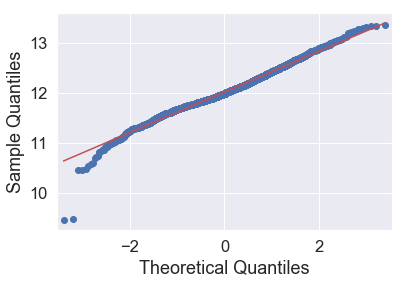

In [28]:
sm.qqplot(
    np.log(ameshousingCleanFiltered['Sale_Price']),
    line = 's'
)

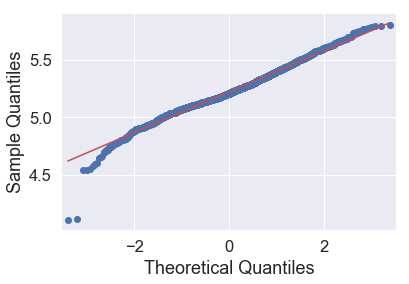

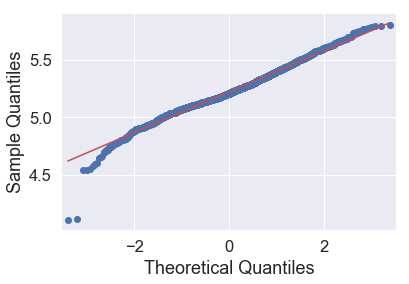

In [29]:
sm.qqplot(
    np.log10(ameshousingCleanFiltered['Sale_Price']),
    line = 's'
)

In [30]:
sortedSalePrice = ameshousingCleanFiltered['Sale_Price'].sort_values()

In [31]:
ameshousingCleanFiltered['Sale_Price'].describe()

count      2925.000000
mean     180411.574701
std       78554.857286
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      625000.000000
Name: Sale_Price, dtype: float64

In [32]:
arr = ameshousingCleanFiltered['Sale_Price'].values.reshape((-1, 1))
list_ordered = preprocessing.quantile_transform(arr)